## Background oMn concentration

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import pandas as pd
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

%matplotlib inline

Observations:

In [24]:
# Concentration of dMn in 2015
Manuel = pd.read_csv('/ocean/brogalla/GEOTRACES/data/DMn_nmolL-1_BR-edited.csv')
Manuel_station_names = Manuel['Station'].astype('string')
Manuel_depths        = Manuel['Depth'].astype('float')
Manuel_dMn_nmolkg    = Manuel['nmol kg-1'].astype('float')
Manuel_dMn_nmolL     = Manuel['nmol L-1'].astype('float')

In [6]:
GEOTRACES = pd.read_csv('/ocean/brogalla/GEOTRACES/data/Pb-paper-data.csv')
stn_names = GEOTRACES['Station names'].dropna().astype('str')
Manuel_lons = GEOTRACES['station lon'].astype('float').dropna().values
Manuel_lats = GEOTRACES['Station lat'].astype('float').dropna().values

In [7]:
p_data  = pd.read_csv('/ocean/brogalla/GEOTRACES/data/pTM_Maldonado_DATA_v2_notes.csv')
p_pMno = p_data['Mn (pmol/L)']
p_pMn = p_pMno[p_pMno != 'BD'].dropna().astype('float').values*1e-3 # pM --> nM
p_depth = p_data['CTDPRS (DBAR)'][p_pMno != 'BD'].astype('float').values
p_stns  = p_data['GEOTR_STN'][p_pMno != 'BD'].astype('str')

# pMn_BB1 = pMn_data['Mn (pmol/L)'].where(stns == 'BB1').dropna().astype('float').values*1e-3 # pM --> nM
# pdepth_BB1 = pMn_data['CTDPRS (DBAR)'].where(stns == 'BB1').dropna().astype('float').values

In [13]:
month=7

# ref0 = nc.Dataset('/data/brogalla/run_storage/Mn-reference-202103/ref-2015-202103/ANHA12_EXH006_2015_monthly.nc')
ref0 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_spin-up0_euphotic/ANHA12_EXH006_2002_monthly.nc')
# ref0 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2015_euphotic/ANHA12_EXH006_2015_monthly.nc')
# sp2 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/ANHA12_ref-2015_increase-sinking/ANHA12_EXH006_2015_monthly.nc')#ANHA12_ref-2015_euphotic/ANHA12_EXH006_2015_monthly.nc')
sp2 = nc.Dataset('/data/brogalla/run_storage/Mn-tuning-202107/resus-test_2021-10-04T182312.666200-0400/ANHA12_EXH006_2002_monthly.nc')

dmn_2015_ref0 = np.array(ref0.variables['dissolmn'])[month,0,:,:,:]
lon_model     = np.array(ref0.variables['nav_lon'])[:,:]
lat_model     = np.array(ref0.variables['nav_lat'])[:,:]
dmn_2015_ref0 = np.array(ref0.variables['dissolmn'])[month,0,:,:,:]
omn_2015_ref0 = np.array(ref0.variables['oxidismn'])[month,0,:,:,:]
dmn_2015      = np.array(sp2.variables['dissolmn'])[month,0,:,:,:]
omn_2015      = np.array(sp2.variables['oxidismn'])[month,0,:,:,:]
deptht        = np.array(sp2.variables['deptht'])

Functions:

In [14]:
def find_index_ANHA12_sub(transect_lons, transect_lats, ANHA12sub_lon=lon_model, ANHA12sub_lat=lat_model):
    # input:   ANHA12sub_lon, ANHA12sub_lat --- 570x600 coordinates
    #          transect_lons, transect_lats --- list of lat and lon values to include in the transect
    # output:  i, j                         --- lists of coordinates associated with these points
    
    transect_i = np.array([])
    transect_j = np.array([])
    
    if isinstance(transect_lons,float):
        i, j = ar.find_closest_model_point(transect_lons, transect_lats, ANHA12sub_lon, ANHA12sub_lat)
        transect_i = int(i)
        transect_j = int(j)
    else:
        for k in range(0,len(transect_lons)):
            i, j = ar.find_closest_model_point(transect_lons[k], transect_lats[k], ANHA12sub_lon, ANHA12sub_lat)
            transect_i = np.append(transect_i, int(i))
            transect_j = np.append(transect_j, int(j))
    
    return transect_i, transect_j

In [31]:
def plot_particulates(name, ax, model_depth, model_omn, obs_depth, obs_pMn, ylim=(100,0)): 
    ax.invert_yaxis()
    ax.set_xlim(0, 5)
    ax.plot(model_omn*1e9, model_depth, c='b')
    ax.plot(obs_pMn, obs_depth, c='r', markersize=15, marker='.', markeredgecolor='k')
    
    try:
        ax.set_ylim(ylim[0],ylim[1])
    except:
        print('empty obs depth array')
    
    ax.set_title(name)
        
    return

Text(0, 0.5, 'Depth [m]')

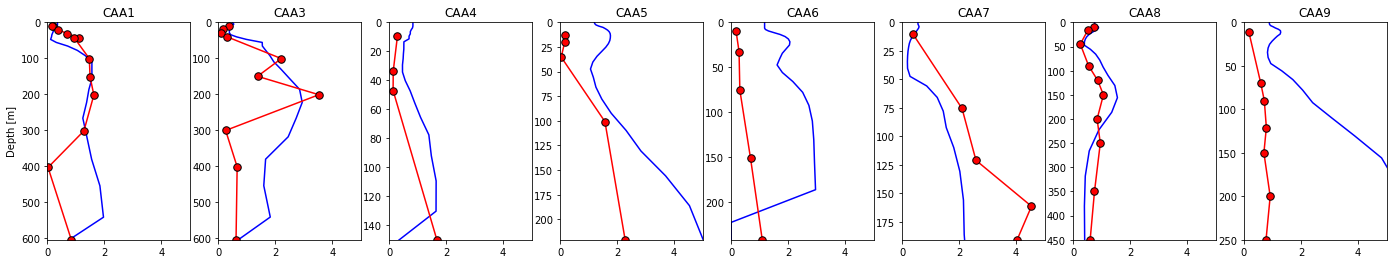

In [16]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, omn_2015[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn], ylim=(np.amax(p_depth[p_stns==stn]),0))
    
ax[0].set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

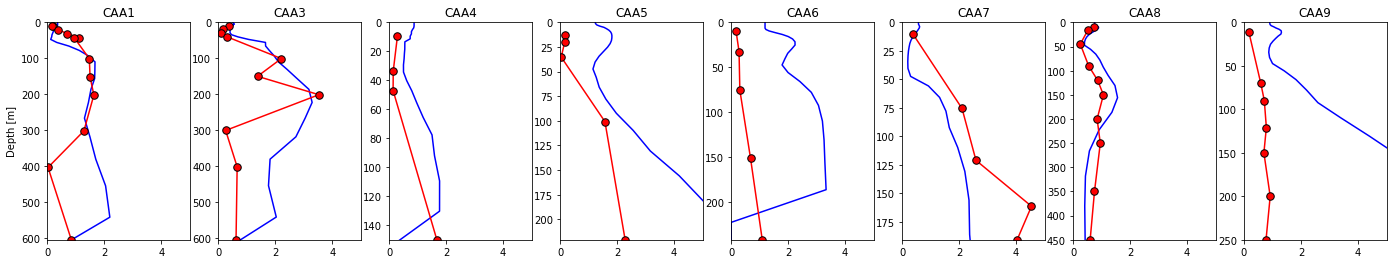

In [17]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, omn_2015_ref0[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn], ylim=(np.amax(p_depth[p_stns==stn]),0))
    
ax[0].set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

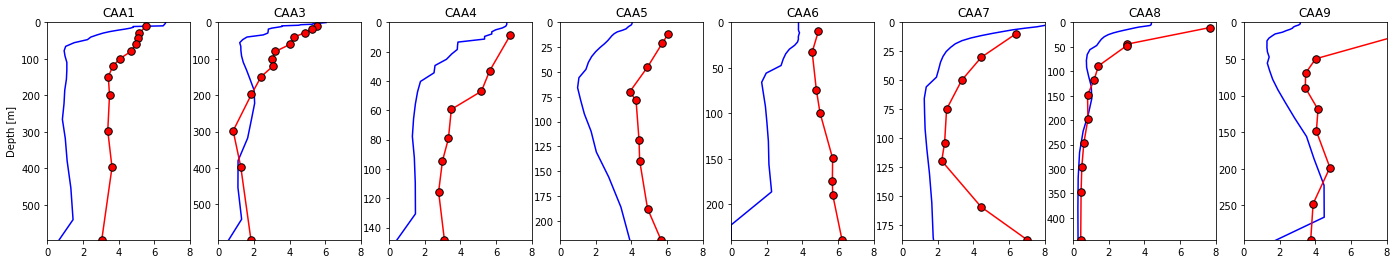

In [26]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, dmn_2015[:,int(i),int(j)], \
                      Manuel_depths[Manuel_station_names==stn], Manuel_dMn_nmolL[Manuel_station_names==stn], \
                      ylim=(np.amax(Manuel_depths[Manuel_station_names==stn]),0))
    
ax[0].set_ylabel('Depth [m]')

Text(0, 0.5, 'Depth [m]')

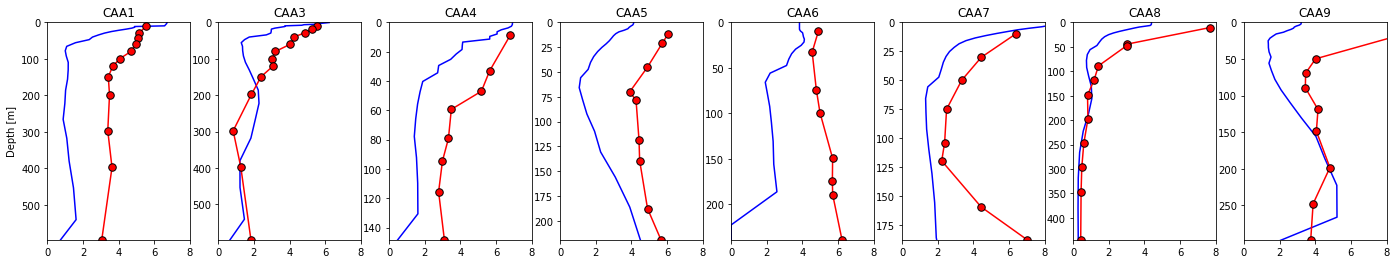

In [27]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, dmn_2015_ref0[:,int(i),int(j)], \
                      Manuel_depths[Manuel_station_names==stn], Manuel_dMn_nmolL[Manuel_station_names==stn], \
                      ylim=(np.amax(Manuel_depths[Manuel_station_names==stn]),0))
     
ax[0].set_ylabel('Depth [m]')

Try run where of oMn > 3 nM, sinking speed increases up to 4 m/day? Would likely improve:
- oMn profiles
- lower water column overestimation at CAA9
- could slightly increase the sub-surface dMn concentrations

Text(0, 0.5, 'Depth [m]')

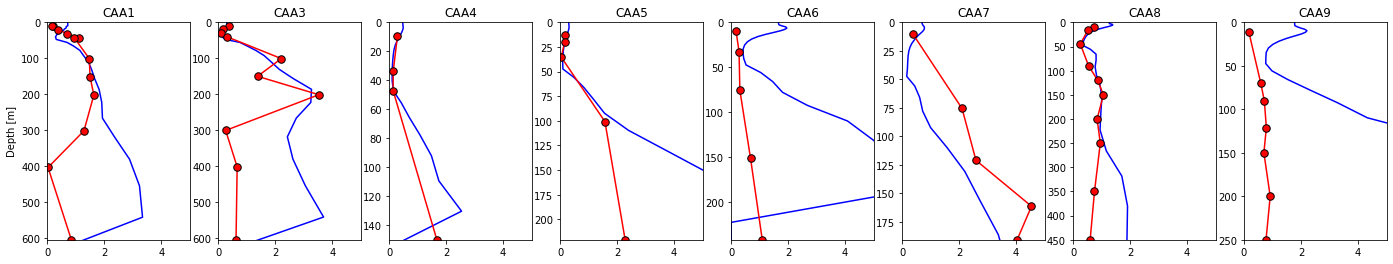

In [14]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, omn_2015[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn], ylim=(np.amax(p_depth[p_stns==stn]),0))
    
ax[0].set_ylabel('Depth [m]')

Above: particulate station profiles for run with sinking speed increased up to 3 m/day for particulate concentrations > 3nM. Visually, not clearly different, so below are the plots of the difference between this run and the reference case with constant sinking rate. Sinking rate primarily impacts the regions as expected.

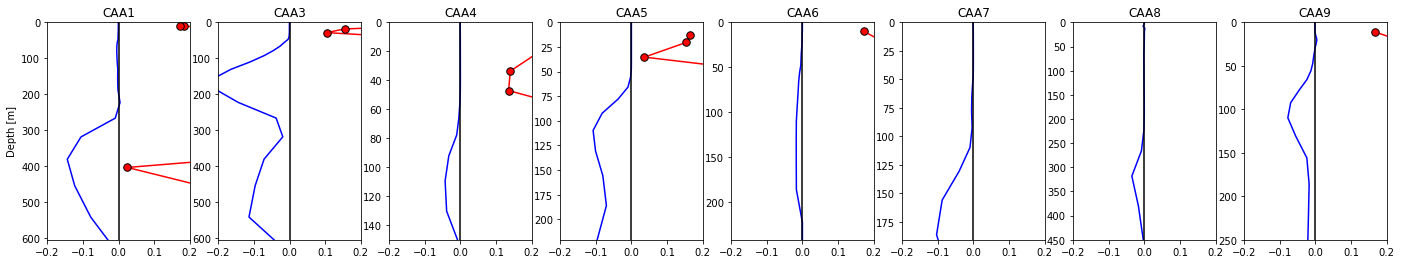

In [20]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, omn_2015[:,int(i),int(j)]-omn_2015_ref0[:,int(i),int(j)], \
                      p_depth[p_stns==stn], p_pMn[p_stns==stn], ylim=(np.amax(p_depth[p_stns==stn]),0))
    
ax[0].set_ylabel('Depth [m]')
for axis in ax.ravel():
    axis.set_xlim([-0.2,0.2])
    axis.plot([0,0],[4000,0],'-k')

Text(0, 0.5, 'Depth [m]')

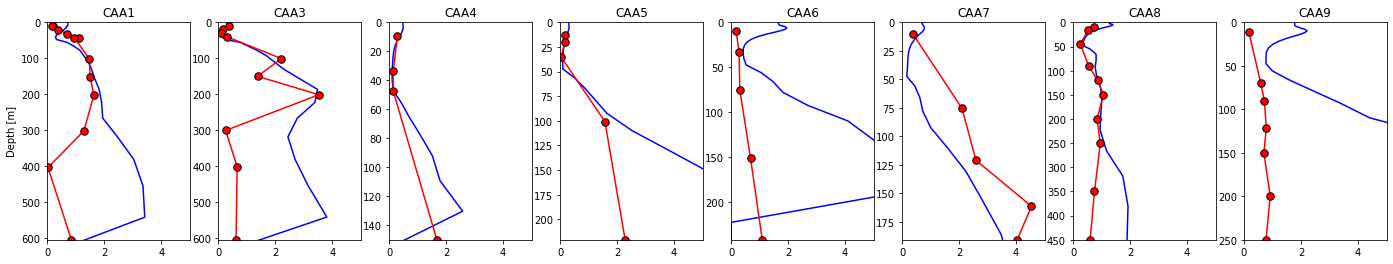

In [18]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, omn_2015[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn], ylim=(np.amax(p_depth[p_stns==stn]),0))
    
ax[0].set_ylabel('Depth [m]')

Below: [pMn] profiles in old reference-run (202103)

Text(0, 0.5, 'Depth [m]')

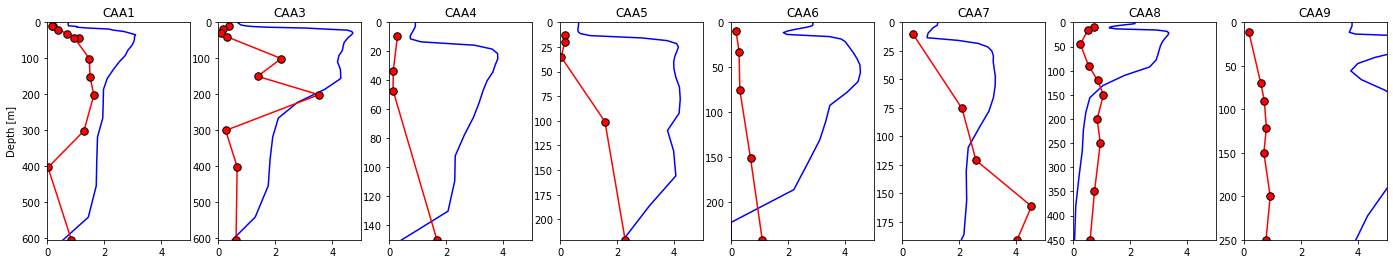

In [13]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
#     dmn_2015[:,i,j]
    plot_particulates(stn, ax[n], deptht, omn_2015_ref0[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn], ylim=(np.amax(p_depth[p_stns==stn]),0))
    
ax[0].set_ylabel('Depth [m]')

upper 100 m of profile in new reference run

Text(0, 0.5, 'Depth [m]')

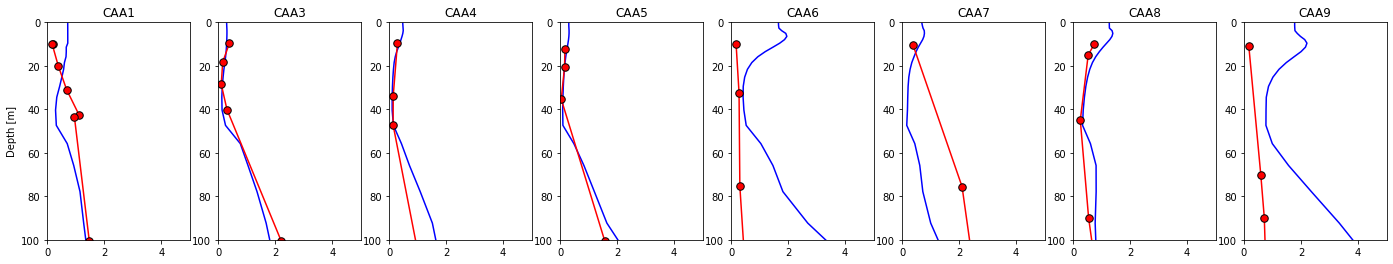

In [14]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
    plot_particulates(stn, ax[n], deptht, omn_2015[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn])
    
ax[0].set_ylabel('Depth [m]')

upper 100 m of profile in old reference run (202103)

Text(0, 0.5, 'Depth [m]')

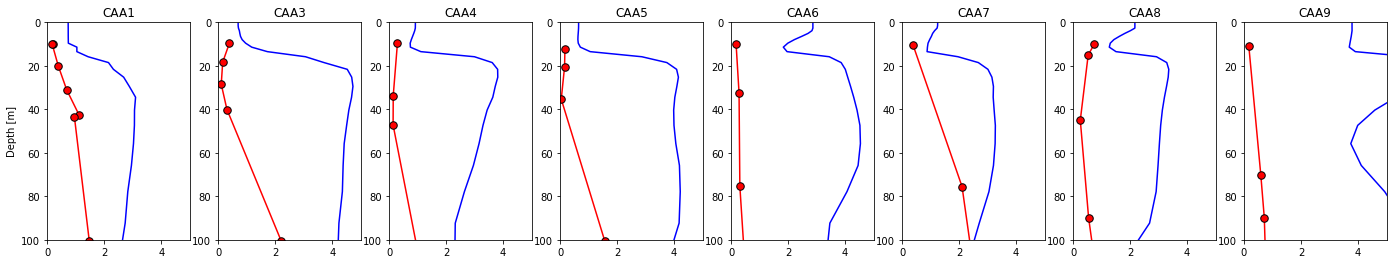

In [15]:
stn_list = ['CAA1','CAA3','CAA4','CAA5','CAA6','CAA7','CAA8','CAA9']

fig, ax = plt.subplots(1,8,figsize=(24,4))
for n, stn in enumerate(stn_list):
    i, j = find_index_ANHA12_sub(Manuel_lons[stn_names==stn], Manuel_lats[stn_names==stn])
    plot_particulates(stn, ax[n], deptht, omn_2015_ref0[:,int(i),int(j)], p_depth[p_stns==stn], p_pMn[p_stns==stn])
    
ax[0].set_ylabel('Depth [m]')